# Visualize common GCAM and Demeter run data


## Load packages

**NOTE**:  You need to install `im3vis` which is the package in this repo.  You can do this by running:

```py
python setup.py install
``` 
from the directory you cloned `im3vis` to.

In [5]:
%matplotlib inline

import os
import pkg_resources

import im3vis
import pandas as pd
import geopandas as gpd
import seaborn as sns; sns.set

import geoplot


## Setup paths to data and other info

In [7]:
# target year you wish to examine
target_year = '2015'

# demeter's GCAM projected land allocation file
gcam_projected_file = pkg_resources.resource_filename('im3vis', 'data/gcam_ref_scenario_reg32_basin235_v5p1p3.csv')

# demeter output file for the target year
demeter_lc_file = pkg_resources.resource_filename('im3vis', f"data/landcover_{target_year}_timestep.csv")

# bounary shapefile for the CONUS loaded as a geopandas dataframe
conus_boundary_gdf = gpd.read_file(pkg_resources.resource_filename('im3vis', "data/ne_50m_conus.shp"))

# a Pandas data frame of GCAM's projected land allocation data
gcam_df = pd.read_csv(gcam_projected_file)

# a geopandas data frame of demeter's output land allocation data with geometry
demeter_gdf = im3vis.build_geodataframe(demeter_lc_file)


In [15]:
dfx = pd.read_pickle('/Users/d3y010/Desktop/demeter_data/demeter_2015.pkl')
dfx.to_csv('/Users/d3y010/Desktop/demeter_data/demeter_2015.csv', index=False)


In [14]:
demeter_gdf = im3vis.build_geodataframe('/Users/d3y010/Desktop/demeter_data/demeter_2015.csv')



In [5]:
gcam_df = pd.read_pickle('/Users/d3y010/Desktop/demeter_data/gcam_df.pkl')

gcam_df.head()


,region,glu_name,region_id,metric_id,landclass,2015,demeter_lc
0,Africa_Eastern,AfrCstE,2,171.0,Corn_IRR,0.026389,NaN
1,Africa_Eastern,AfrCstE,2,171.0,Corn_RFD,8.827320,NaN
2,Africa_Eastern,AfrCstE,2,171.0,FiberCrop_IRR,0.021205,NaN
3,Africa_Eastern,AfrCstE,2,171.0,FiberCrop_RFD,0.189931,NaN
4,Africa_Eastern,AfrCstE,2,171.0,Forest,4.855879,forest


## GCAM total land allocation by region for all land classes

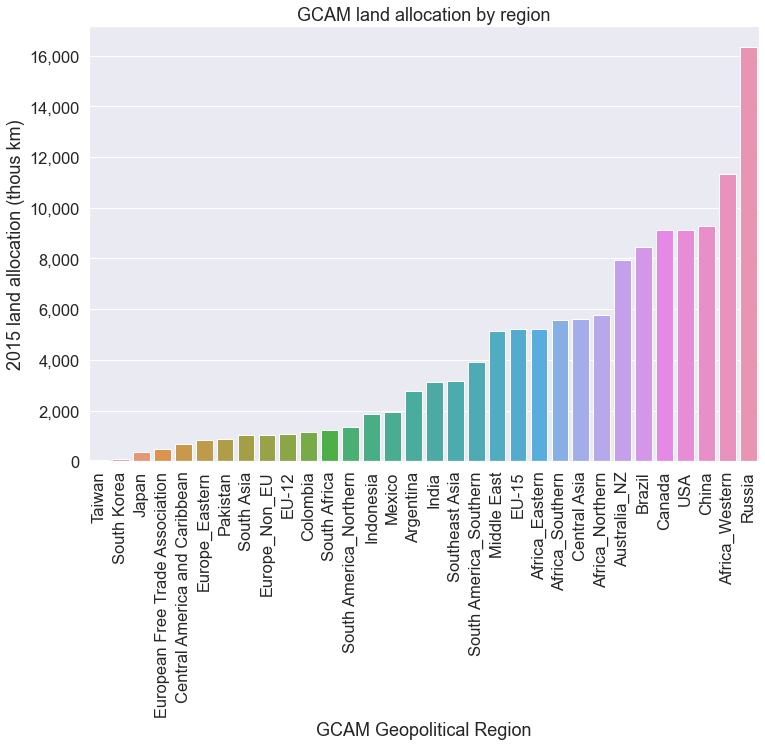

In [4]:
reg_ax = im3vis.gcam_demeter_region(gcam_df, target_year)

## GCAM total land allocation by region for combined Corn and Wheat

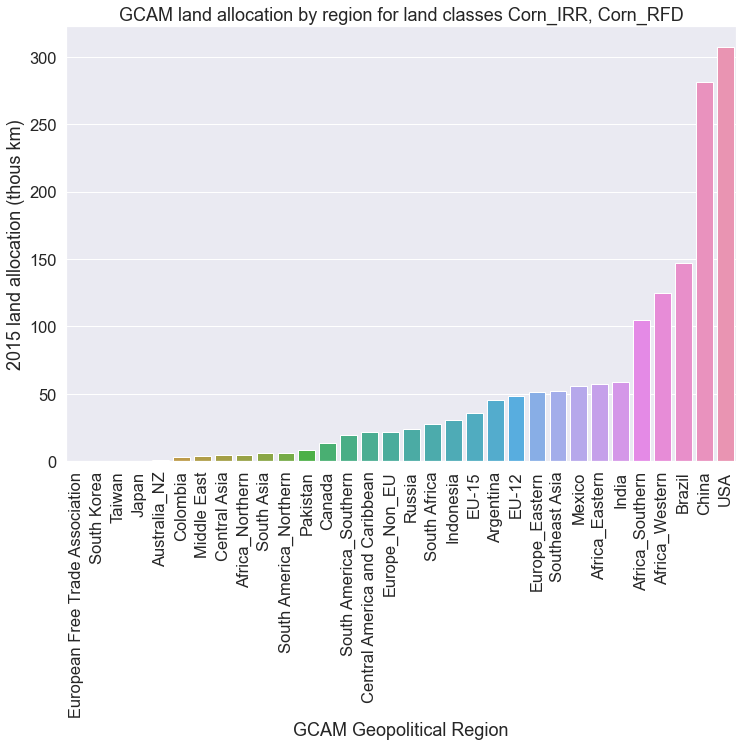

In [7]:
reg_ax = im3vis.gcam_demeter_region(gcam_df, target_year, landclass_list=['Corn_IRR', 'Corn_RFD'])

## GCAM allocation of `crops` from 2015 through 2100 in the USA binned by Demeter crop types


In [9]:
grp = im3vis.plot_gcam_reclassified(gcam_df, landclass='Corn_IRR', start_yr=2015)

KeyError: "['2025', '2045', '2060', '2080', '2055', '2075', '2065', '2070', '2050', '2020', '2035', '2095', '2090', '2100', '2085', '2030', '2040'] not in index"

In [14]:
gcam_df.loc[(gcam_df['region_id'] == 1) & (gcam_df['landclass'] == 'Corn_IRR')]

,region,glu_name,region_id,metric_id,landclass,2015,demeter_lc
11059,USA,FraserR,1,27.0,Corn_IRR,0.000047,NaN
11084,USA,GreatLakes,1,227.0,Corn_IRR,1.216619,NaN
11113,USA,MissouriR,1,223.0,Corn_IRR,29.185150,NaN
11146,USA,NelsonR,1,23.0,Corn_IRR,0.210972,NaN
11187,USA,UsaCstNE,1,232.0,Corn_IRR,0.022183,NaN
11214,USA,UsaPacNW,1,229.0,Corn_IRR,0.982638,NaN
11246,USA,Caribbean,1,101.0,Corn_IRR,0.009250,NaN
11269,USA,California,1,217.0,Corn_IRR,1.387570,NaN
11305,USA,MexCstNW,1,96.0,Corn_IRR,0.107734,NaN
11333,USA,RioGrande,1,231.0,Corn_IRR,0.136605,NaN


## GCAM `forest` allocation for year 2015 for the CONUS

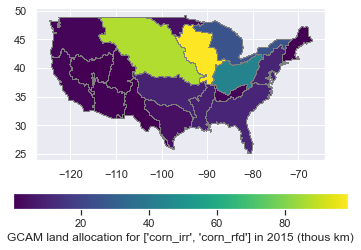

In [4]:
agg_df = im3vis.plot_gcam_conus_basin(gcam_df, 
                                      target_year='2015', 
                                      landclass=['corn_irr', 'corn_rfd'], 
                                      default_mapping='crop_yield')


## Demeter `forest` output for year 2015 for the CONUS

In [4]:
demeter_gdf.columns

Index(['latitude', 'longitude', 'basin_id', 'region_id', 'water', 'crop1_irr',
       'crop10_irr', 'crop11_irr', 'crop12_irr', 'crop13_irr', 'crop15_irr',
       'crop16_irr', 'crop17_irr', 'crop2_irr', 'crop21_irr', 'crop25_irr',
       'crop3_irr', 'crop4_irr', 'crop6_irr', 'crop7_irr', 'crop8_irr',
       'crop9_irr', 'crop1_rfd', 'crop10_rfd', 'crop11_rfd', 'crop12_rfd',
       'crop13_rfd', 'crop15_rfd', 'crop16_rfd', 'crop17_rfd', 'crop2_rfd',
       'crop21_rfd', 'crop25_rfd', 'crop3_rfd', 'crop4_rfd', 'crop6_rfd',
       'crop7_rfd', 'crop8_rfd', 'crop9_rfd', 'forest', 'grassland',
       'otherarableland', 'palmfruit_irr', 'palmfruit_rfd', 'pasture',
       'rockicedesert', 'shrubland', 'unmanagedforest', 'unmanagedpasture',
       'urbanland', 'biomassgrass_irr', 'biomassgrass_rfd', 'biomasstree_irr',
       'biomasstree_rfd', 'tundra', 'geometry'],
      dtype='object')

In [10]:
metadata

NameError: name 'metadata' is not defined

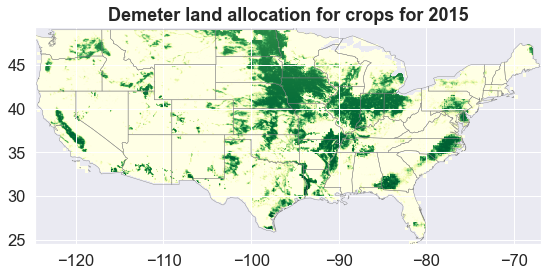

In [9]:
r = im3vis.plot_conus_raster(conus_boundary_gdf, demeter_gdf, landclass='crops', target_year=target_year)


In [44]:
import tempfile
import geopandas as gpd
import rasterio

from shapely.geometry import Point
from rasterio import features
from rasterio.plot import show
from matplotlib import pyplot as plt

landclass = 'crop2_rfd'


In [45]:
demeter_gdf = demeter_gdf.loc[demeter_gdf['region_id'] == 1].copy()

In [46]:
sns.set(font_scale=1.5)

# generate a temporary file
temp_file = tempfile.NamedTemporaryFile(suffix='.tif')
rast = temp_file.name



In [47]:
demeter_gdf.columns

Index(['latitude', 'longitude', 'basin_id', 'region_id', 'water', 'crop1_irr',
       'crop10_irr', 'crop11_irr', 'crop12_irr', 'crop13_irr', 'crop15_irr',
       'crop16_irr', 'crop17_irr', 'crop2_irr', 'crop21_irr', 'crop25_irr',
       'crop3_irr', 'crop4_irr', 'crop6_irr', 'crop7_irr', 'crop8_irr',
       'crop9_irr', 'crop1_rfd', 'crop10_rfd', 'crop11_rfd', 'crop12_rfd',
       'crop13_rfd', 'crop15_rfd', 'crop16_rfd', 'crop17_rfd', 'crop2_rfd',
       'crop21_rfd', 'crop25_rfd', 'crop3_rfd', 'crop4_rfd', 'crop6_rfd',
       'crop7_rfd', 'crop8_rfd', 'crop9_rfd', 'forest', 'grassland',
       'otherarableland', 'palmfruit_irr', 'palmfruit_rfd', 'pasture',
       'rockicedesert', 'shrubland', 'unmanagedforest', 'unmanagedpasture',
       'urbanland', 'biomassgrass_irr', 'biomassgrass_rfd', 'biomasstree_irr',
       'biomasstree_rfd', 'tundra', 'geometry'],
      dtype='object')

In [48]:
# create a generator of geom, value pairs to use in rasterizing
shapes = ((geom, value) for geom, value in zip(demeter_gdf.geometry.values, demeter_gdf[landclass].values))



In [49]:
# template_raster = pkg_resources.resource_filename('im3vis', 'data/demeter_conus_template.tif')
template_raster = '/Users/d3y010/Desktop/conus_0p5deg_wgs84.tif'

r = rasterio.open(template_raster)
metadata = r.meta.copy()
metadata.update(compress='lzw')
r.close()


In [50]:
metadata

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 114,
 'height': 48,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.5, 0.0, -125.0,
        0.0, -0.5, 49.0),
 'compress': 'lzw'}

In [51]:
# burn point values in to raster
with rasterio.open(rast, 'w+', **metadata) as out:
    out_arr = out.read(1)

    burned = features.rasterize(shapes=shapes, fill=metadata['nodata'], out=out_arr, transform=out.transform)
    out.write_band(1, burned)



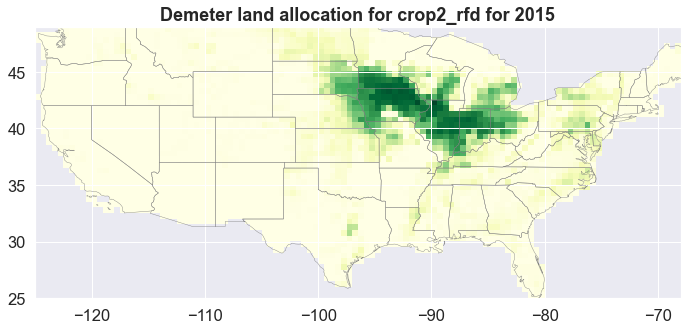

In [55]:
# open and visualize
with rasterio.open(rast) as src:
    fig, ax = plt.subplots(1, figsize=(12, 5))

    conus_boundary_gdf.geometry.boundary.plot(ax=ax, color='grey', lw=0.4)

    show(src,
         cmap='YlGn',
         ax=ax,
         title=f"Demeter land allocation for {landclass} for {target_year}")

In [19]:
lc_mapping = {'Wheat_IRR': 'wheat_irr',
                     'RootTuber_IRR': 'root_tuber_irr',
                     'SugarCrop_IRR': 'sugarcrop_irr',
                     'OilCrop_IRR': 'oilcrop_irr',
                     'MiscCrop_IRR': 'misccrop_irr',
                     'FodderHerb_IRR': 'fodderherb_irr',
                     'Corn_IRR': 'corn_irr',
                     'FiberCrop_IRR': 'fibercrop_irr',
                     'FodderGrass_IRR': 'foddergrass_irr',
                     'Rice_IRR': 'rice_irr',
                     'OtherGrain_IRR': 'othergrain_irr',
                     'Wheat_RFD': 'wheat_rfd',
                     'RootTuber_RFD': 'root_tuber_rfd',
                     'SugarCrop_RFD': 'sugarcrop_rfd',
                     'OilCrop_RFD': 'oilcrop_rfd',
                     'MiscCrop_RFD': 'misccrop_rfd',
                     'FodderHerb_RFD': 'fodderherb_rfd',
                     'Corn_RFD': 'corn_rfd',
                     'FiberCrop_RFD': 'fibercrop_rfd',
                     'FodderGrass_RFD': 'foddergrass_rfd',
                     'Rice_RFD': 'rice_rfd',
                     'OtherGrain_RFD': 'othergrain_rfd',
                     'Forest': 'forest',
                     'Grassland': 'grass',
                     'OtherArableLand': 'otherarableland',
                     'PalmFruit_IRR': 'palmfruit_irr',
                     'PalmFruit_RFD': 'palmfruit_rfd',
                     'Pasture': 'grass',
                     'RockIceDesert': 'snow',
                     'Shrubland': 'shrub',
                     'UnmanagedForest': 'forest',
                     'UnmanagedPasture': 'grass',
                     'UrbanLand': 'urban',
                     'biomassGrass_IRR': 'biomass_grass_irr',
                     'biomassGrass_RFD': 'biomass_grass_rfd',
                     'biomassTree_IRR': 'biomass_tree_irr',
                     'biomassTree_RFD': 'biomass_tree_rfd',
                     'Tundra': 'sparse'}

landclass = 'corn_irr'
target_year = '2015'

In [20]:
gcam_df = pd.read_pickle('/Users/d3y010/Desktop/demeter_data/gcam_df.pkl')

gcam_df.head()

,region,glu_name,region_id,metric_id,landclass,2015,demeter_lc
0,Africa_Eastern,AfrCstE,2,171.0,Corn_IRR,0.026389,NaN
1,Africa_Eastern,AfrCstE,2,171.0,Corn_RFD,8.827320,NaN
2,Africa_Eastern,AfrCstE,2,171.0,FiberCrop_IRR,0.021205,NaN
3,Africa_Eastern,AfrCstE,2,171.0,FiberCrop_RFD,0.189931,NaN
4,Africa_Eastern,AfrCstE,2,171.0,Forest,4.855879,forest


In [21]:
gxf = gpd.read_file(pkg_resources.resource_filename('im3vis', 'data/conus_basins.shp'))

# only account for forest mapping for demonstration
gcam_df['demeter_lc'] = gcam_df['landclass'].map(lc_mapping)



In [22]:
# only keep forest classes in the USA
gcam_df = gcam_df.loc[(gcam_df['demeter_lc'] == landclass) & (gcam_df['region'] == 'USA')].copy()



In [23]:
# only keep what we need
gcam_us = gcam_df[['metric_id', 'demeter_lc', target_year]].copy()



In [24]:
# group by metric id
grp_us = gcam_us.groupby('metric_id').sum()
grp_us.reset_index(inplace=True)



In [25]:
# rename metric id field
grp_us.rename(columns={'metric_id': 'basin_id'}, inplace=True)


In [26]:

# merge with spatial boundaries
mdf = gxf.merge(grp_us, on='basin_id')



In [27]:
mdf.head()

,key,basin_nm,reg_nm,basin_id,reg_id,geometry,2015
0,1228,Ohio_River_Basin,USA,228,1,"MULTIPOLYGON (((-89.25000 37.16667, -89.08333 ...",0.571409
1,1229,Pacific_Northwest_Basin,USA,229,1,"MULTIPOLYGON (((-122.75000 49.00000, -122.3333...",0.982638
2,1027,Fraser,USA,27,1,"MULTIPOLYGON (((-122.33333 49.00000, -122.2500...",0.000047
3,1096,Mexico_Northwest_Coast,USA,96,1,"MULTIPOLYGON (((-109.83333 31.91667, -109.5000...",0.107734
4,1232,New_England_Basin,USA,232,1,"MULTIPOLYGON (((-68.41667 44.33333, -68.33333 ...",0.022183


<AxesSubplot:>

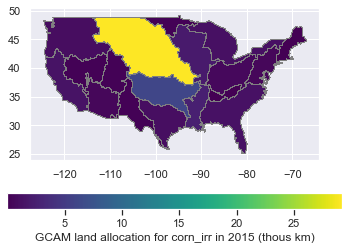

In [30]:
import  matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
mdf.plot(column=target_year,
         ax=ax,
         legend=True,
         figsize=(15, 10),
         edgecolor='grey',
         legend_kwds={'label': f"GCAM land allocation for {landclass} in {target_year} (thous km)",
                      'orientation': "horizontal"},
         cmap='viridis')